In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


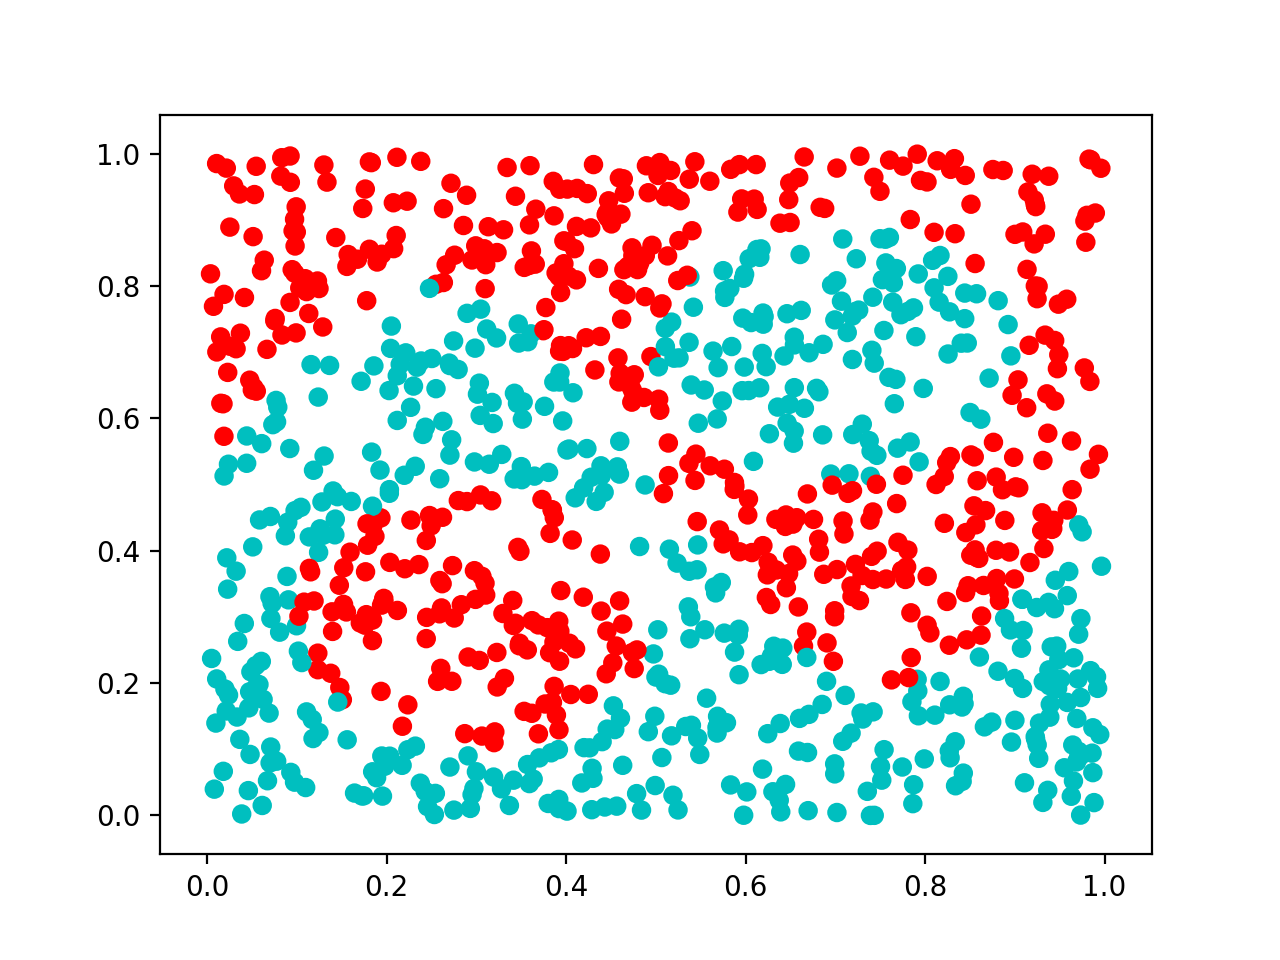

In [3]:
x = np.random.random(1000)
y = np.random.random(1000)
z = (y < 0.3*np.sin(2*np.pi*x) + 0.5)*(np.sqrt((x-0.3)**2 + (y-0.3)**2) > 0.2)
z = z + (np.sqrt((x-0.7)**2 + (y-0.7)**2) < 0.2)
z2 = np.array(['r']*1000)
z2[z] = 'cyan'
plt.scatter(x,y, color=z2)
plt.show()

In [58]:
class myNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=62)
        self.fc3 = nn.Linear(in_features=62, out_features=42)
        self.fc4 = nn.Linear(in_features=42, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=2)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output(x)
        return x

In [59]:
model = myNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [60]:
X = torch.FloatTensor(np.vstack((x, y)).T)
Z = torch.LongTensor(z)

In [61]:
%%time
epochs = 2000
loss_arr = []
for i in range(epochs):
    y_hat = model.forward(X)
    loss = criterion(y_hat, Z)
    loss_arr.append(loss)
 
    if i % 50 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.6995023488998413
Epoch: 50 Loss: 0.46488043665885925
Epoch: 100 Loss: 0.28171566128730774
Epoch: 150 Loss: 0.18695347011089325
Epoch: 200 Loss: 0.15513446927070618
Epoch: 250 Loss: 0.13314801454544067
Epoch: 300 Loss: 0.11792123317718506
Epoch: 350 Loss: 0.12651397287845612
Epoch: 400 Loss: 0.06806423515081406
Epoch: 450 Loss: 0.053927190601825714
Epoch: 500 Loss: 0.04359762743115425
Epoch: 550 Loss: 0.19125324487686157
Epoch: 600 Loss: 0.06551395356655121
Epoch: 650 Loss: 0.04647461697459221
Epoch: 700 Loss: 0.03805982694029808
Epoch: 750 Loss: 0.03192201256752014
Epoch: 800 Loss: 0.026769349351525307
Epoch: 850 Loss: 0.022164558991789818
Epoch: 900 Loss: 0.018420789390802383
Epoch: 950 Loss: 0.015467786230146885
Epoch: 1000 Loss: 0.013235200196504593
Epoch: 1050 Loss: 0.011569962836802006
Epoch: 1100 Loss: 0.010176103562116623
Epoch: 1150 Loss: 0.00903174839913845
Epoch: 1200 Loss: 0.008097788318991661
Epoch: 1250 Loss: 0.007118111941963434
Epoch: 1300 Loss: 0.006394

In [62]:
preds = []
with torch.no_grad():
    for val in X:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [63]:
df = pd.DataFrame({"Z": Z, "Z_hat": preds})

In [64]:
sum(df.Z.values == df.Z_hat.values)/df.shape[0]

0.982

<IPython.core.display.Javascript object>


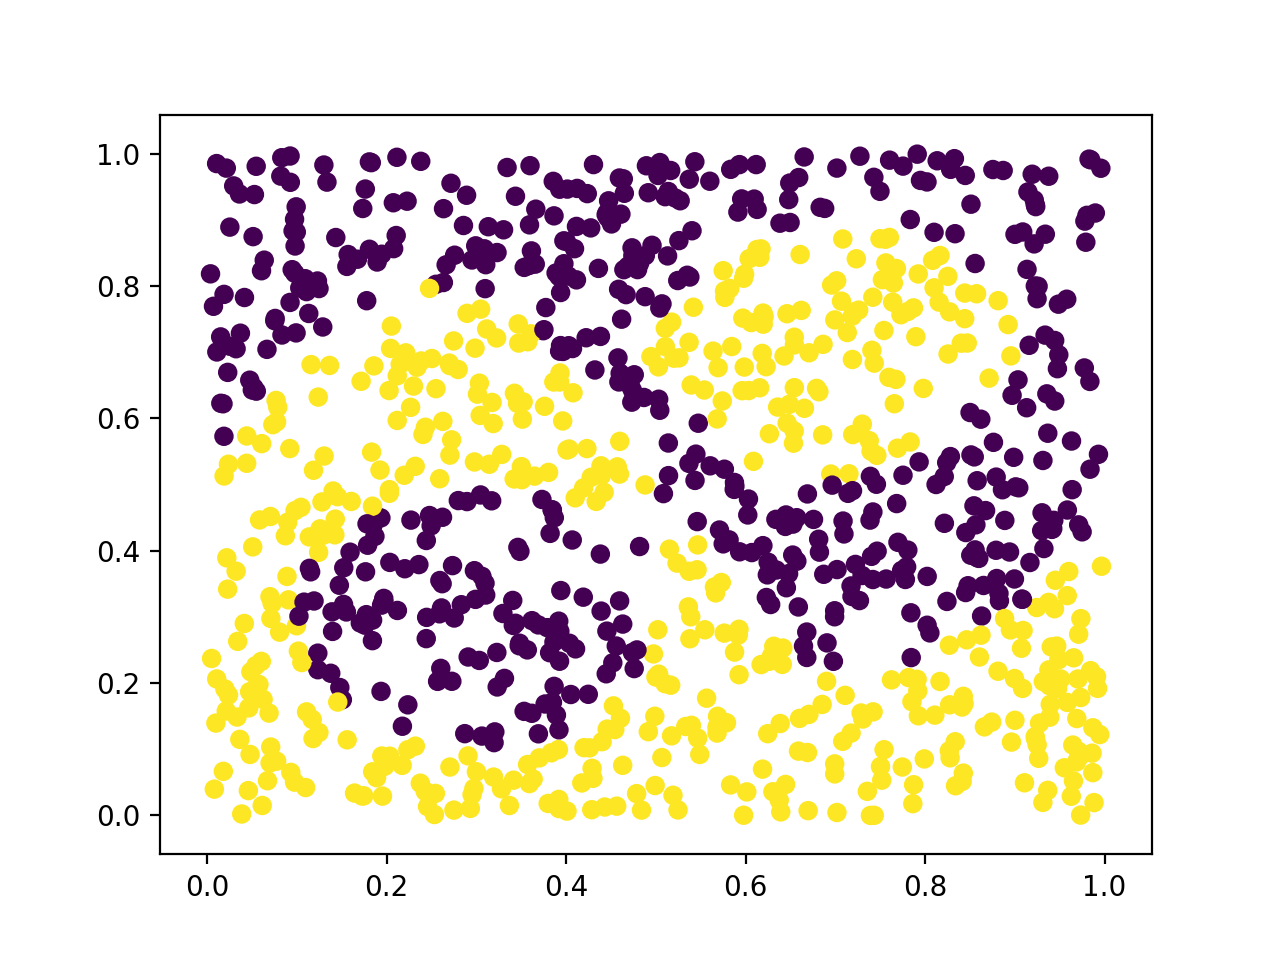

In [65]:
plt.scatter(x, y, c = df.Z_hat.values)
plt.show()